In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/randomdivvy/Random-sample.csv


In this notebook, i will do some univariate analysis on latitude and longitude variable as well as some other attributes

In [2]:
df = pd.read_csv("/kaggle/input/randomdivvy/Random-sample.csv")
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B36BAB1BB9CEE953,electric_bike,2024-01-11 22:10:59 UTC,2024-01-11 22:11:44 UTC,Paulina St & Montrose Ave,TA1309000021,Paulina St & Montrose Ave,TA1309000021,41.961476,-87.671397,41.961507,-87.671387,casual
1,373FE762F1A95A4B,classic_bike,2024-02-02 16:23:17 UTC,2024-02-02 16:34:19 UTC,Rush St & Hubbard St,KA1503000044,Canal St & Monroe St,13056,41.890173,-87.626185,41.881690,-87.639530,member
2,5C7020D5D164B3DA,classic_bike,2024-02-22 12:53:44 UTC,2024-02-22 13:00:11 UTC,Dearborn Pkwy & Delaware Pl,TA1307000128,Wabash Ave & Wacker Pl,TA1307000131,41.898969,-87.629912,41.886875,-87.626030,member
3,F42A5E31E734168D,classic_bike,2024-01-27 10:55:30 UTC,2024-01-27 11:06:22 UTC,Ravenswood Ave & Lawrence Ave,TA1309000066,Lincoln Ave & Sunnyside Ave,TA1307000156,41.968445,-87.674226,41.963004,-87.684781,casual
4,E0BB82060876E16E,electric_bike,2024-02-20 08:18:44 UTC,2024-02-20 08:18:59 UTC,Lincoln Ave & Diversey Pkwy,TA1307000064,NaN,NaN,41.932097,-87.658787,41.930000,-87.660000,member


In [3]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.898804,-87.646559,41.899349,-87.647130
std,0.046850,0.027006,0.047094,0.027162
min,41.684595,-87.810000,41.684595,-87.840000
25%,41.879389,-87.660000,41.879344,-87.661198
50%,41.894716,-87.643353,41.895748,-87.643948
75%,41.926277,-87.629912,41.928830,-87.630000
max,42.070000,-87.530000,42.070000,-87.530000


From a statistical standpoint, the data and value looked sound and we are only considering trips inside of Chicago so the number all look relatively fine

In [4]:
df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name    1293
start_station_id      1293
end_station_name      1355
end_station_id        1355
start_lat                0
start_lng                0
end_lat                  0
end_lng                  0
member_casual            0
dtype: int64

As can be seen we have no null values except for the station which is understandable as we have already did some cleaning in SQL. As for the station, they will not have an effect on our analysis so it can be safely ignore

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='start_lng', ylabel='Count'>

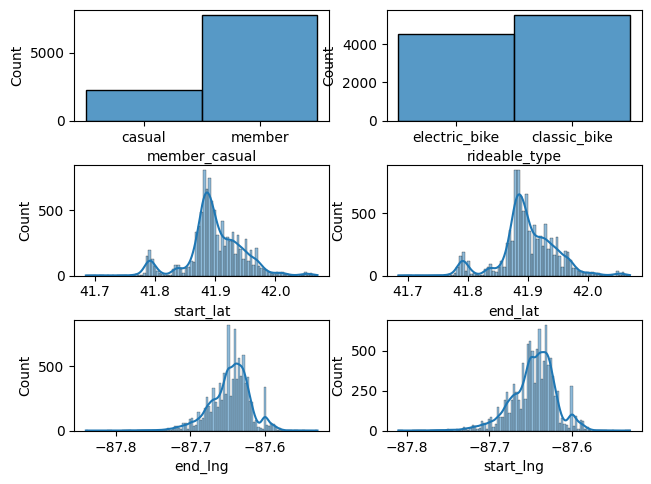

In [12]:
f, axes = plt.subplots(3, 2)
f.tight_layout()
sns.histplot(x=df['member_casual'],ax=axes[0,0])
sns.histplot(x=df['rideable_type'],ax=axes[0,1])
sns.histplot(x=df['start_lat'],kde=True,ax=axes[1,0])
sns.histplot(x=df['end_lat'],kde=True,ax=axes[1,1])
sns.histplot(x=df['end_lng'],kde=True,ax=axes[2,0])
sns.histplot(x=df['start_lng'],kde=True,ax=axes[2,1])

The distribution for the lattitude seems to not follow the standard normal distribution let's calculate kurtosis and skewness to see

In [21]:
print("Skewness of start_lat:", df['start_lat'].skew())
print("Kurtosis of start_lat:", df['start_lat'].kurt())

Skewness of start_lat: -0.22465714196911726
Kurtosis of start_lat: 1.560025904626102


It seems that start_lat have minimal skewness and a little kurtosis

In [22]:
print("Skewness of end_lat:", df['end_lat'].skew())
print("Kurtosis of end_lat:", df['end_lat'].kurt())

Skewness of end_lat: -0.2444216473842503
Kurtosis of end_lat: 1.584685676021706


It seems that end_lat have minimal skewness and a little kurtosis

In [23]:
print("Skewness of start_lng:", df['start_lng'].skew())
print("Kurtosis of start_lng:", df['start_lng'].kurt())

Skewness of start_lng: -0.6780736941195411
Kurtosis of start_lng: 1.9099351855682154


It seems that start_lng have minimal skewness and a slightly higher kurtosis

In [24]:
print("Skewness of end_lng:", df['end_lng'].skew())
print("Kurtosis of end_lng:", df['end_lng'].kurt())

Skewness of end_lng: -0.7311464564676585
Kurtosis of end_lng: 2.132098465330188


It seems that end_lng have minimal skewness and high kurtosis compare to other parameters

In [18]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
df_n = encoder.fit_transform(df[['start_lat','end_lat','start_lng','end_lng','member_casual']]).head()

<Axes: >

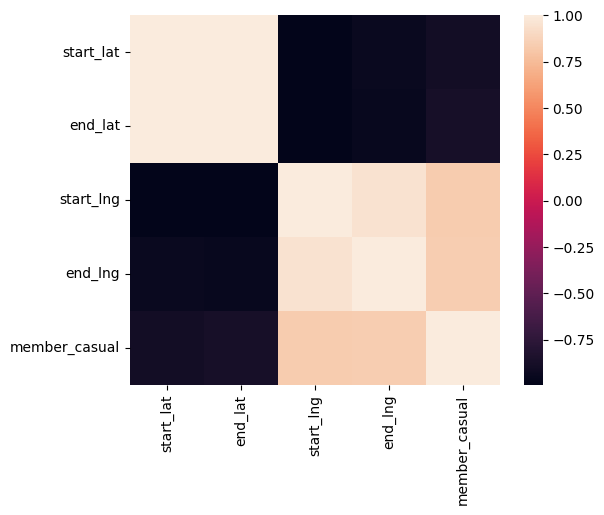

In [19]:
sns.heatmap(df_n.corr(),square=True)

In order to get a better look let's calculate the Spearman correlation out

In [27]:
from scipy import stats
stats.spearmanr(df_n['start_lng'],df_n['member_casual'])

SignificanceResult(statistic=0.8660254037844386, pvalue=0.05766888562243733)

There is an 86% correlation so it is also advised that longitude be taken into consideration and amounts of bike at specific longitude be increased

In [28]:
from scipy import stats
stats.spearmanr(df_n['end_lng'],df_n['member_casual'])

SignificanceResult(statistic=0.8660254037844386, pvalue=0.05766888562243733)

There is an 86% correlation so it is also advised that longitude be taken into consideration and amounts of bike at specific longitude be increased